In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage.metrics import structural_similarity

# Define our imshow function 
def imshow(title = "Image", image = None, size = 6):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()


#### **Mean Squared Error (MSE)**

The MSE between the two images is the sum of the squared difference between the two images. This can easily be implemented with numpy.

The lower the MSE the more similar the images are.

In [2]:
def mse(image1, image2):
	# Images must be of the same dimension
	error = np.sum((image1.astype("float") - image2.astype("float")) ** 2)
	error /= float(image1.shape[0] * image1.shape[1])

	return error

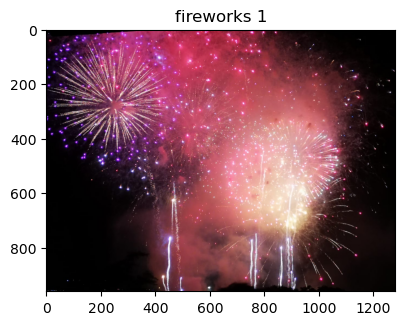

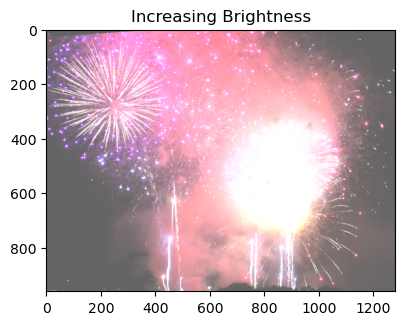

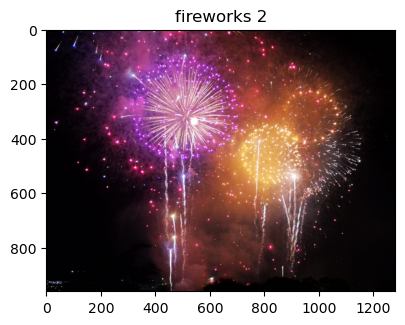

In [5]:
fireworks1 = cv2.imread('images/fireworks.jpeg')
fireworks2 = cv2.imread('images/fireworks2.jpeg')

M = np.ones(fireworks1.shape, dtype = "uint8") * 100 
fireworks1b = cv2.add(fireworks1, M)

imshow("fireworks 1", fireworks1)
imshow("Increasing Brightness", fireworks1b)
imshow("fireworks 2", fireworks2)

In [6]:
def compare(image1, image2):
  image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
  image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
  print('MSE = {:.2f}'.format(mse(image1, image2)))
  print('SS = {:.2f}'.format(structural_similarity(image1, image2)))

In [7]:
compare(fireworks1, fireworks1)

MSE = 0.00
SS = 1.00


In [8]:
compare(fireworks1, fireworks2)

MSE = 2125.41
SS = 0.48


In [9]:
compare(fireworks1, fireworks1b)

MSE = 8809.38
SS = 0.52


In [10]:
compare(fireworks2, fireworks1b)

MSE = 13418.54
SS = 0.19
